# Import Dependencies

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist

import numpy as np

import matplotlib.pyplot as plt

2023-07-29 19:38:36.683992: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-29 19:38:37.993393: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/wasin/miniconda3/envs/tf/lib/:/home/wasin/miniconda3/envs/tf/lib/python3.9/site-packages/nvidia/cudnn/lib:/home/wasin/miniconda3/envs/tf/lib/:/home/wasin/miniconda3/envs/tf/lib/python3.9/site-packages/nvidia/cudnn/lib
2023-07-29 19:38:37.996039: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnv

# Load MNIST dataset

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255
x_test = x_test / 255



# Add a channel dimension to the images (required for CNN)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

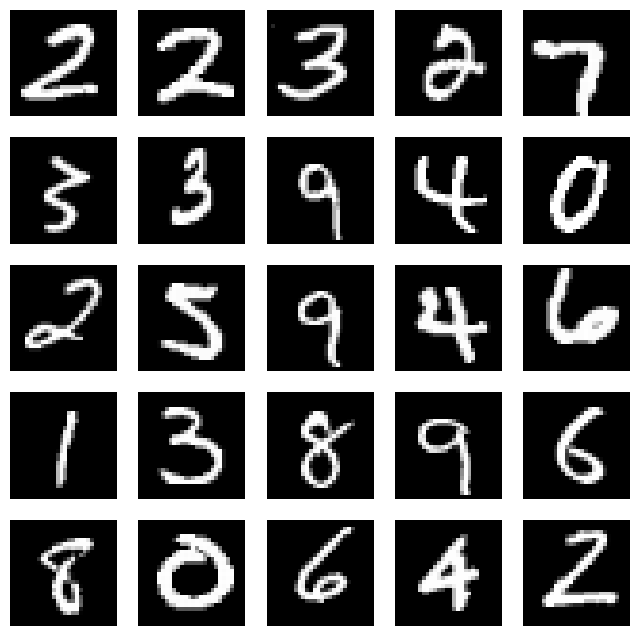

In [3]:
# Plot Sample Images
# Plot the first 25 images in the training set.

figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 5

for i in range(1, cols * rows + 1):
    sample_idx = np.random.randint(len(x_train))
    img = x_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

In [4]:
# Convert data to binary format since our web app will be using binary data 1s and 0s for pixel

threshold = 0.5

x_train = (x_train > threshold).astype(np.int8)
x_test = (x_test > threshold).astype(np.int8)

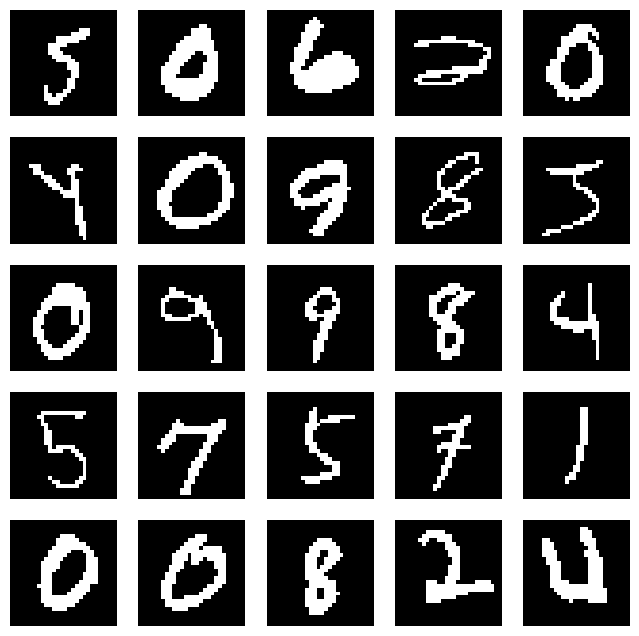

In [5]:
# Plot Sample Images
# Plot the first 25 images in the training set.

figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 5

for i in range(1, cols * rows + 1):
    sample_idx = np.random.randint(len(x_train))
    img = x_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

# Create Model

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for digits 0 to 9
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
from tensorflow.keras import mixed_precision

policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 2070 with Max-Q Design, compute capability 7.5


# Train the Model

In [8]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5


2023-07-29 19:38:46.364086: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 10.2.89, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2023-07-29 19:38:46.666723: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 10.2.89, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2023-07-29 19:38:46.821993: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 10.2.89, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address

   1/1875 [..............................] - ETA: 2:13:04 - loss: 2.3271 - accuracy: 0.0625

2023-07-29 19:38:47.879217: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 10.2.89, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2023-07-29 19:38:48.009492: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 10.2.89, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


1875/1875 [==============================] - 19s 8ms/step - loss: 0.1620 - accuracy: 0.9500 - val_loss: 0.0561 - val_accuracy: 0.9817
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0517 - accuracy: 0.9844 - val_loss: 0.0393 - val_accuracy: 0.9871
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0373 - accuracy: 0.9880 - val_loss: 0.0429 - val_accuracy: 0.9866
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0325 - val_accuracy: 0.9902
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0205 - accuracy: 0.9931 - val_loss: 0.0353 - val_accuracy: 0.9892


In [14]:
tf.saved_model.save(model, "mnist_model")

INFO:tensorflow:Assets written to: mnist_model/assets


INFO:tensorflow:Assets written to: mnist_model/assets
